In [62]:
!featurize dataset download afb91f90-e695-4819-b5d3-98a9a1e954bd

100%|████████████████████████████████████████| 169M/169M [00:00<00:00, 645MiB/s]
🍬  下载完成，正在解压...
🏁  数据集已经成功添加


In [63]:
!pip install split-folders

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [64]:
import splitfolders
splitfolders.ratio(input='data/dataset/train', output='images', seed=1337, ratio=(0.6, 0.2, 0.2))

Copying files: 3587 files [00:00, 9738.58 files/s] 


In [65]:
!pip install fastai

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [66]:
from fastai.vision.all import *

In [67]:
path = Path('images')

In [68]:
item_tfms = Resize(224)

In [69]:
batch_tfms = aug_transforms()

In [70]:
dls = ImageDataLoaders.from_folder(
    path,
    train = 'train',
    valid = 'val',
    seed = 42,
    item_tfms = item_tfms,
    batch_tfms = batch_tfms)

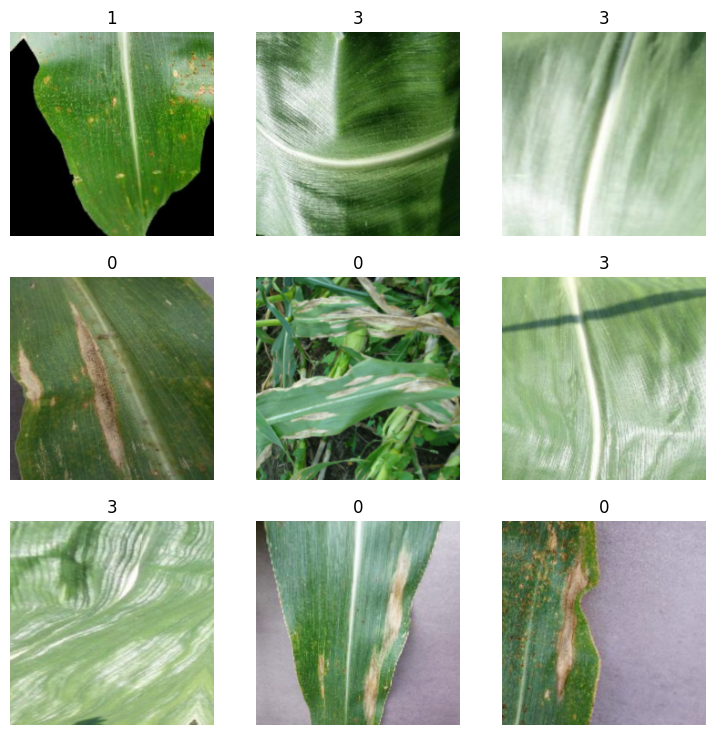

In [71]:
dls.show_batch()

In [72]:
arch = resnet34

In [73]:
weights=ResNet34_Weights.DEFAULT

In [74]:
learn = vision_learner(dls, arch, metrics=accuracy)

/environment/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/environment/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [75]:
from fastai.callback.tracker import EarlyStoppingCallback, SaveModelCallback

In [76]:
early_stop_cb = EarlyStoppingCallback

In [77]:
save_model_cb = SaveModelCallback()

In [78]:
learn.fine_tune(100, 1e-4, cbs=[early_stop_cb, save_model_cb])

epoch,train_loss,valid_loss,accuracy,time
0,1.872834,0.639919,0.745810,00:04


Better model found at epoch 0 with valid_loss value: 0.639919102191925.


epoch,train_loss,valid_loss,accuracy,time
0,1.143316,0.519916,0.794693,00:05
1,1.015481,0.428747,0.832402,00:05
2,0.911342,0.368007,0.861732,00:05
3,0.823137,0.326067,0.865922,00:05
4,0.726380,0.290334,0.884078,00:05
5,0.642962,0.257766,0.900838,00:05
6,0.598649,0.240061,0.905028,00:05
7,0.565759,0.217244,0.912011,00:05
8,0.512036,0.200761,0.921788,00:04
9,0.473235,0.185952,0.925978,00:05


Better model found at epoch 0 with valid_loss value: 0.5199163556098938.
Better model found at epoch 1 with valid_loss value: 0.42874693870544434.
Better model found at epoch 2 with valid_loss value: 0.36800724267959595.
Better model found at epoch 3 with valid_loss value: 0.32606664299964905.
Better model found at epoch 4 with valid_loss value: 0.29033395648002625.
Better model found at epoch 5 with valid_loss value: 0.25776639580726624.
Better model found at epoch 6 with valid_loss value: 0.2400609254837036.
Better model found at epoch 7 with valid_loss value: 0.2172444462776184.
Better model found at epoch 8 with valid_loss value: 0.20076076686382294.
Better model found at epoch 9 with valid_loss value: 0.1859523355960846.
Better model found at epoch 10 with valid_loss value: 0.1706567406654358.
Better model found at epoch 11 with valid_loss value: 0.1649978756904602.
Better model found at epoch 12 with valid_loss value: 0.150495246052742.
Better model found at epoch 13 with valid_l

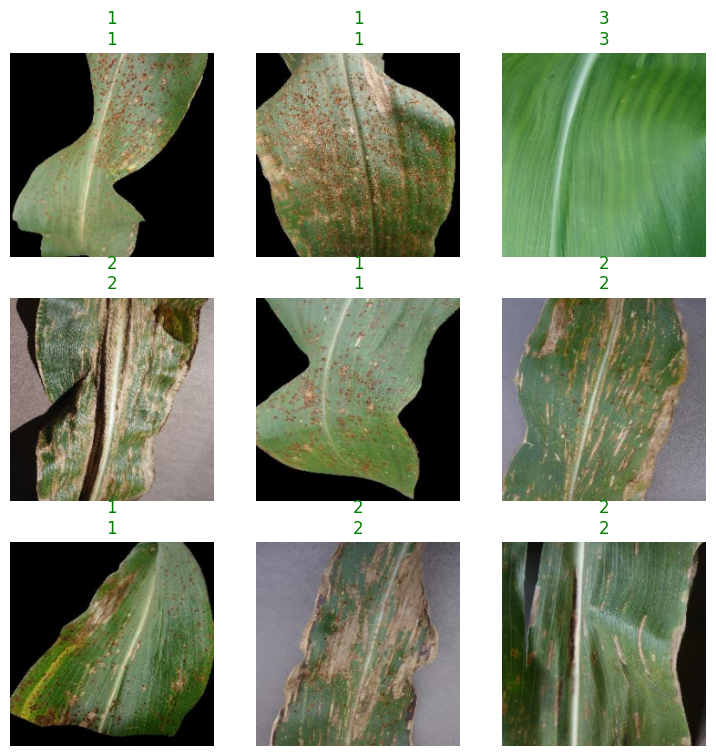

In [79]:
learn.show_results()

In [80]:
interp = ClassificationInterpretation.from_learner(learn)

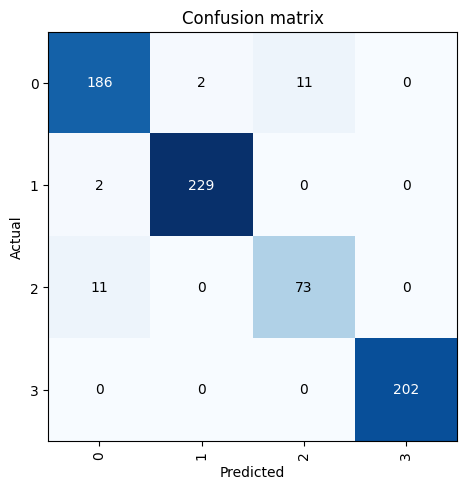

In [81]:
interp.plot_confusion_matrix()

In [82]:
interp.print_classification_report()

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       199
           1       0.99      0.99      0.99       231
           2       0.87      0.87      0.87        84
           3       1.00      1.00      1.00       202

    accuracy                           0.96       716
   macro avg       0.95      0.95      0.95       716
weighted avg       0.96      0.96      0.96       716



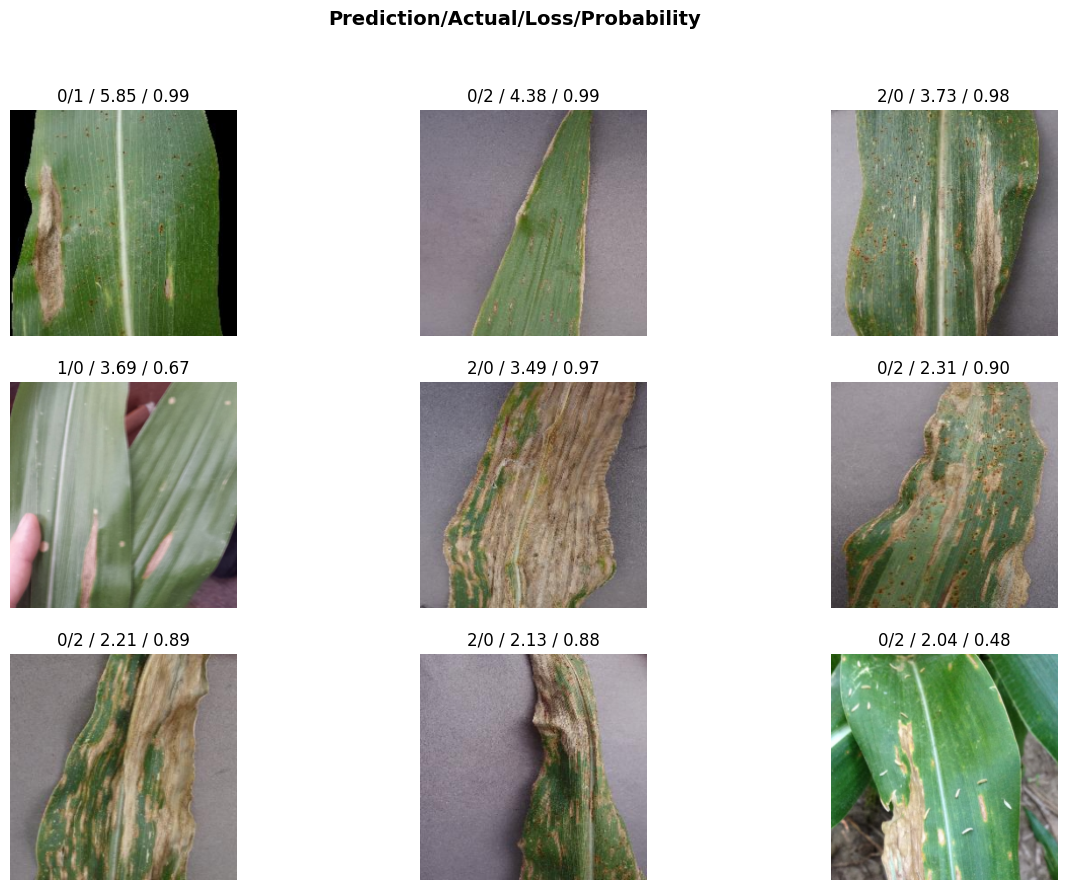

In [83]:
interp.plot_top_losses(9, figsize=(15,10))

In [84]:
test_dl = dls.test_dl(get_image_files(path/'test'),
                      with_labels=True)

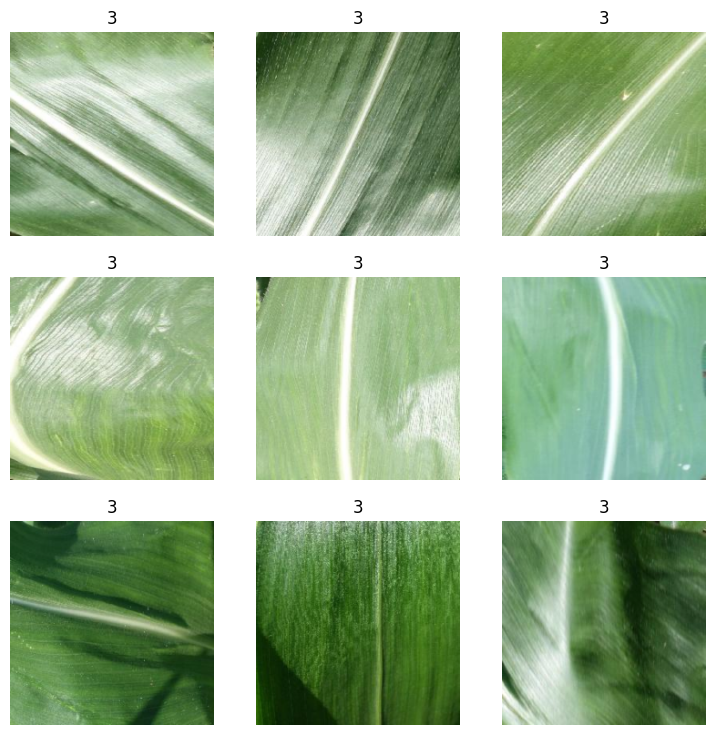

In [85]:
test_dl.show_batch()

In [86]:
preds, targets = learn.get_preds(dl=test_dl)

In [87]:
preds

tensor([[2.2056e-05, 5.6003e-06, 6.8537e-06, 9.9997e-01],
        [5.6119e-04, 1.2195e-04, 1.1927e-03, 9.9812e-01],
        [5.2919e-06, 2.6288e-07, 1.7191e-06, 9.9999e-01],
        ...,
        [4.2155e-04, 9.9956e-01, 1.7357e-05, 7.2049e-07],
        [1.5836e-04, 9.9960e-01, 2.2461e-04, 1.6658e-05],
        [2.6221e-09, 1.0000e+00, 7.0640e-07, 1.0087e-08]])

In [88]:
targets

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [89]:
from fastai.tabular.all import *

In [90]:
accuracy(preds, targets)

TensorBase(0.9569)

In [91]:
interp = ClassificationInterpretation.from_learner(learn, 
                                                   dl=test_dl)

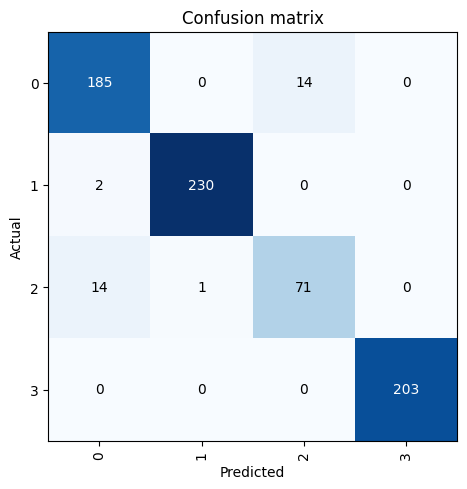

In [92]:
interp.plot_confusion_matrix()

In [93]:
learn.export(fname='export.pkl')